In [3]:
import numpy as np
import sys
import matplotlib.pyplot as plt
sys.path.append('../SourceCode')
import bastien_utils
from shallowAE import ShallowAE
from sparseShallowAE import SparseShallowAE_KL, SparseShallowAE_L1, SparseShallowAE_KL_sum
from nonNegSparseShallowAE import Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint
import datetime
import morphoMaths
import keras
import pandas as pd
keras.__version__

'2.2.0'

In [4]:
FILE_PATH = "../"
path_to_kl_div_sum = "../ShallowAE/Sparse/KL_div_sum/"
data = bastien_utils.load_data(FILE_PATH, train=False, test=True, subsetTest=True)
x_test, y_test, x_small, y_small = data
print('x_small shape:', x_small.shape)
print('x_test shape:', x_test.shape)

x_small shape: (10, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


In [5]:
pd.read_csv("../ShallowAE/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/18_08_02results")

,Unnamed: 0,sparsity_objective,sparsity_weight,test_error,test_kl_loss,test_max_approx_error_toOriginal_dilatation,test_max_approx_error_toRec_dilatation,test_sparsity,training_error,training_kl_loss,training_max_approx_error_toOriginal_dilatation,training_max_approx_error_toRec_dilatation,training_sparsity
0,0,0.01,0.01,0.086789,0.000249,0.111852,0.000607,0.075785,0.087162,0.000204,0.112263,0.000639,0.075903
1,1,0.05,0.01,0.021066,0.001705,0.047626,0.034116,0.539181,0.020750,0.001676,0.047074,0.034051,0.540071
2,2,0.10,0.01,0.014943,0.000843,0.192799,0.202248,0.385122,0.014748,0.000806,0.192002,0.201514,0.386240
3,3,0.20,0.01,0.012286,0.000788,0.566170,0.599657,0.255831,0.012218,0.000761,0.565158,0.598196,0.256335
4,4,0.01,0.10,0.086733,0.001905,0.111466,0.000413,0.040638,0.087103,0.001501,0.111828,0.000423,0.040519
5,5,0.05,0.10,0.028382,0.004330,0.043000,0.014550,0.328806,0.028033,0.004087,0.042375,0.014452,0.330491
6,6,0.10,0.10,0.022087,0.005779,0.055880,0.044411,0.307632,0.022011,0.005464,0.055697,0.044178,0.308715
7,7,0.20,0.10,0.021491,0.012245,0.119289,0.114897,0.222271,0.021488,0.012647,0.119076,0.114478,0.222972
8,8,0.01,0.50,0.086668,0.005058,0.110903,0.000183,0.015747,0.087035,0.004310,0.111231,0.000179,0.015743
9,9,0.05,0.50,0.086663,0.010331,0.111378,0.000708,0.008468,0.087032,0.008444,0.111715,0.000706,0.008417


In [8]:
sparsity_objectives = np.load('../ShallowAE/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/18_08_02_sparsityObjectives_dim100.npy')
sparsity_weights = np.load('../ShallowAE/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/18_08_02_sparsityWeights_dim100.npy')
test_mse = np.load('../ShallowAE/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/18_08_02_test_errors_dim100.npy')
train_mse = np.load('../ShallowAE/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/18_08_02_training_errors_dim100.npy')
test_kl_loss = np.load('../ShallowAE/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/18_08_02_test_kl_loss_dim100.npy')
train_kl_loss = np.load('../ShallowAE/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/18_08_02_training_kl_loss_dim100.npy')
test_max_approx_to_Original = np.load('../ShallowAE/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/18_08_02_test_max_approx_error_toOriginal_dilation_dim100.npy')
train_max_approx_to_Original = np.load('../ShallowAE/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/18_08_02_training_max_approx_error_toOriginal_dilatation_dim100.npy')
test_max_approx_to_Rec = np.load('../ShallowAE/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/18_08_02_test_max_approx_error_toRec_dilation_dim100.npy')
train_max_approx_to_Rec = np.load('../ShallowAE/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/18_08_02_training_max_approx_error_toRec_dilatation_dim100.npy')
test_sparsity = np.load('../ShallowAE/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/18_08_02_test_sparsity_dim100.npy')
train_sparsity = np.load('../ShallowAE/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/18_08_02_training_sparsity_dim100.npy')

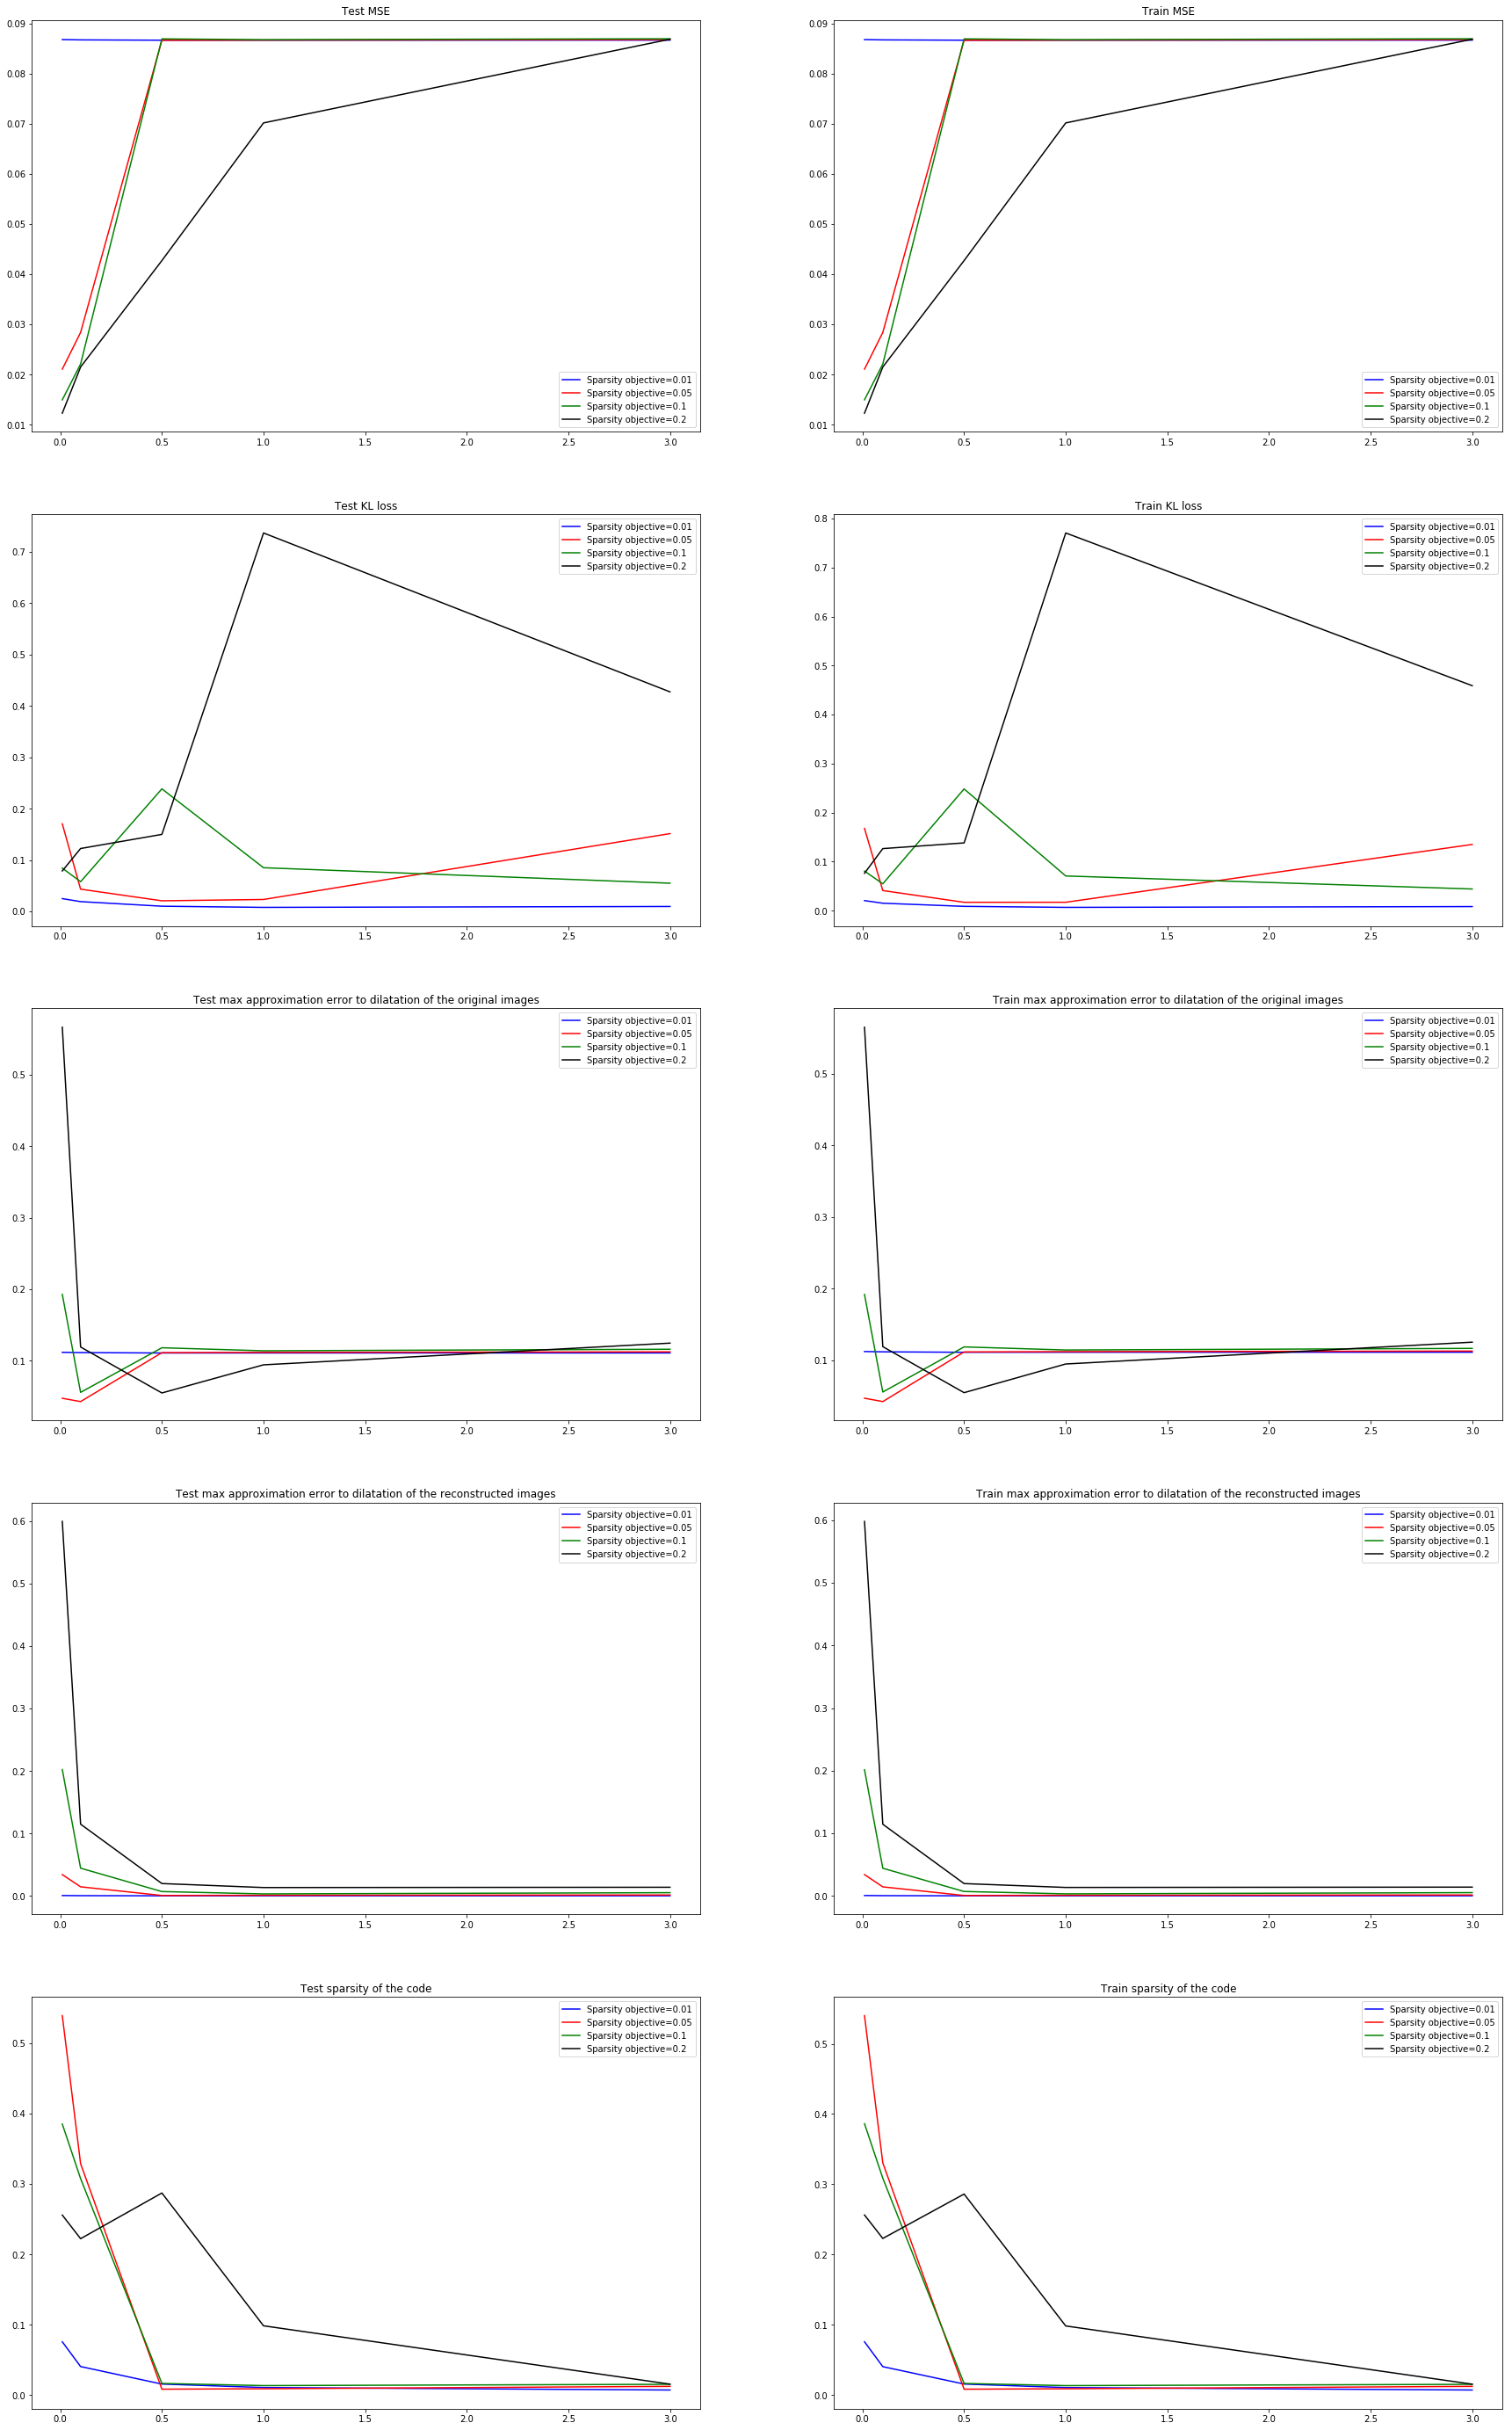

In [9]:
plt.figure(figsize=(30,50))

ax = plt.subplot(5, 2, 1)
ax.plot(sparsity_weights, test_mse[:,0], 'b')
ax.plot(sparsity_weights, test_mse[:,1], 'r')
ax.plot(sparsity_weights, test_mse[:,2], 'g')
ax.plot(sparsity_weights, test_mse[:,3], 'k')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Test MSE')

ax = plt.subplot(5, 2, 2)
ax.plot(sparsity_weights, test_mse[:,0], 'b')
ax.plot(sparsity_weights, test_mse[:,1], 'r')
ax.plot(sparsity_weights, test_mse[:,2], 'g')
ax.plot(sparsity_weights, test_mse[:,3], 'k')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Train MSE')

ax = plt.subplot(5, 2, 3)
ax.plot(sparsity_weights, test_kl_loss[:,0]/sparsity_weights, 'b')
ax.plot(sparsity_weights, test_kl_loss[:,1]/sparsity_weights, 'r')
ax.plot(sparsity_weights, test_kl_loss[:,2]/sparsity_weights, 'g')
ax.plot(sparsity_weights, test_kl_loss[:,3]/sparsity_weights, 'k')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Test KL loss')


ax = plt.subplot(5, 2, 4)
ax.plot(sparsity_weights, train_kl_loss[:,0]/sparsity_weights, 'b')
ax.plot(sparsity_weights, train_kl_loss[:,1]/sparsity_weights, 'r')
ax.plot(sparsity_weights, train_kl_loss[:,2]/sparsity_weights, 'g')
ax.plot(sparsity_weights, train_kl_loss[:,3]/sparsity_weights, 'k')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Train KL loss')

ax = plt.subplot(5, 2, 5)
ax.plot(sparsity_weights, test_max_approx_to_Original[:,0], 'b')
ax.plot(sparsity_weights, test_max_approx_to_Original[:,1], 'r')
ax.plot(sparsity_weights, test_max_approx_to_Original[:,2], 'g')
ax.plot(sparsity_weights, test_max_approx_to_Original[:,3], 'k')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Test max approximation error to dilatation of the original images')


ax = plt.subplot(5, 2, 6)
ax.plot(sparsity_weights, train_max_approx_to_Original[:,0], 'b')
ax.plot(sparsity_weights, train_max_approx_to_Original[:,1], 'r')
ax.plot(sparsity_weights, train_max_approx_to_Original[:,2], 'g')
ax.plot(sparsity_weights, train_max_approx_to_Original[:,3], 'k')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Train max approximation error to dilatation of the original images')


ax = plt.subplot(5, 2, 7)
ax.plot(sparsity_weights, test_max_approx_to_Rec[:,0], 'b')
ax.plot(sparsity_weights, test_max_approx_to_Rec[:,1], 'r')
ax.plot(sparsity_weights, test_max_approx_to_Rec[:,2], 'g')
ax.plot(sparsity_weights, test_max_approx_to_Rec[:,3], 'k')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Test max approximation error to dilatation of the reconstructed images')

ax = plt.subplot(5, 2, 8)
ax.plot(sparsity_weights, train_max_approx_to_Rec[:,0], 'b')
ax.plot(sparsity_weights, train_max_approx_to_Rec[:,1], 'r')
ax.plot(sparsity_weights, train_max_approx_to_Rec[:,2], 'g')
ax.plot(sparsity_weights, train_max_approx_to_Rec[:,3], 'k')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Train max approximation error to dilatation of the reconstructed images')


ax = plt.subplot(5, 2, 9)
ax.plot(sparsity_weights, test_sparsity[:,0], 'b')
ax.plot(sparsity_weights, test_sparsity[:,1], 'r')
ax.plot(sparsity_weights, test_sparsity[:,2], 'g')
ax.plot(sparsity_weights, test_sparsity[:,3], 'k')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Test sparsity of the code')


ax = plt.subplot(5, 2, 10)
ax.plot(sparsity_weights, train_sparsity[:,0], 'b')
ax.plot(sparsity_weights, train_sparsity[:,1], 'r')
ax.plot(sparsity_weights, train_sparsity[:,2], 'g')
ax.plot(sparsity_weights, train_sparsity[:,3], 'k')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Train sparsity of the code')

plt.show()